In [7]:
import json
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np

# Set the base directory
base_dir = Path("/home/ubuntu/working_dir/eval/eval_completion/evals_results/humaneval-ns0")

# Lists to store the data
data = []

# Iterate through all subfolders
for folder in sorted(base_dir.iterdir()):
    if folder.is_dir():
        # Find JSON files starting with "results"
        for json_file in folder.glob("results*.json"):
            try:
                # Read the JSON file
                with open(json_file, 'r') as f:
                    json_data = json.load(f)
                
                # Extract pass@1 and pass@10 metrics
                pass_at_1 = json_data.get("results", {}).get("humaneval", {}).get("pass@1,create_test", None)
                pass_at_10 = json_data.get("results", {}).get("humaneval", {}).get("pass@10,create_test", None)
                
                # Extract step number from folder name
                step_match = re.search(r'global_step_(\d+)', folder.name)
                step = int(step_match.group(1)) if step_match else None
                
                if pass_at_1 is not None and pass_at_10 is not None:
                    data.append({
                        'step': step,
                        'folder': folder.name,
                        'pass@1': pass_at_1,
                        'pass@10': pass_at_10
                    })
                    print(f"Found metrics in {folder.name}: step={step}, pass@1={pass_at_1:.4f}, pass@10={pass_at_10:.4f}")
            except Exception as e:
                print(f"Error processing {json_file}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data)
df = df.sort_values('step')

print(f"\nTotal folders processed: {len(df)}")
print("\nDataFrame:")
print(df)


Found metrics in __home__ubuntu__working_dir__logs__Open_DLLM_SFT_code__checkpoints__global_step_0__hf_ckpt: step=0, pass@1=0.1817, pass@10=0.3537
Found metrics in __home__ubuntu__working_dir__logs__Open_DLLM_SFT_code__checkpoints__global_step_104__hf_ckpt: step=104, pass@1=0.1494, pass@10=0.2744
Found metrics in __home__ubuntu__working_dir__logs__Open_DLLM_SFT_code__checkpoints__global_step_1092__hf_ckpt: step=1092, pass@1=0.1530, pass@10=0.3110
Found metrics in __home__ubuntu__working_dir__logs__Open_DLLM_SFT_code__checkpoints__global_step_1248__hf_ckpt: step=1248, pass@1=0.1585, pass@10=0.3232
Found metrics in __home__ubuntu__working_dir__logs__Open_DLLM_SFT_code__checkpoints__global_step_130__hf_ckpt: step=130, pass@1=0.1500, pass@10=0.2927
Found metrics in __home__ubuntu__working_dir__logs__Open_DLLM_SFT_code__checkpoints__global_step_1404__hf_ckpt: step=1404, pass@1=0.1530, pass@10=0.3278
Found metrics in __home__ubuntu__working_dir__logs__Open_DLLM_SFT_code__checkpoints__global_

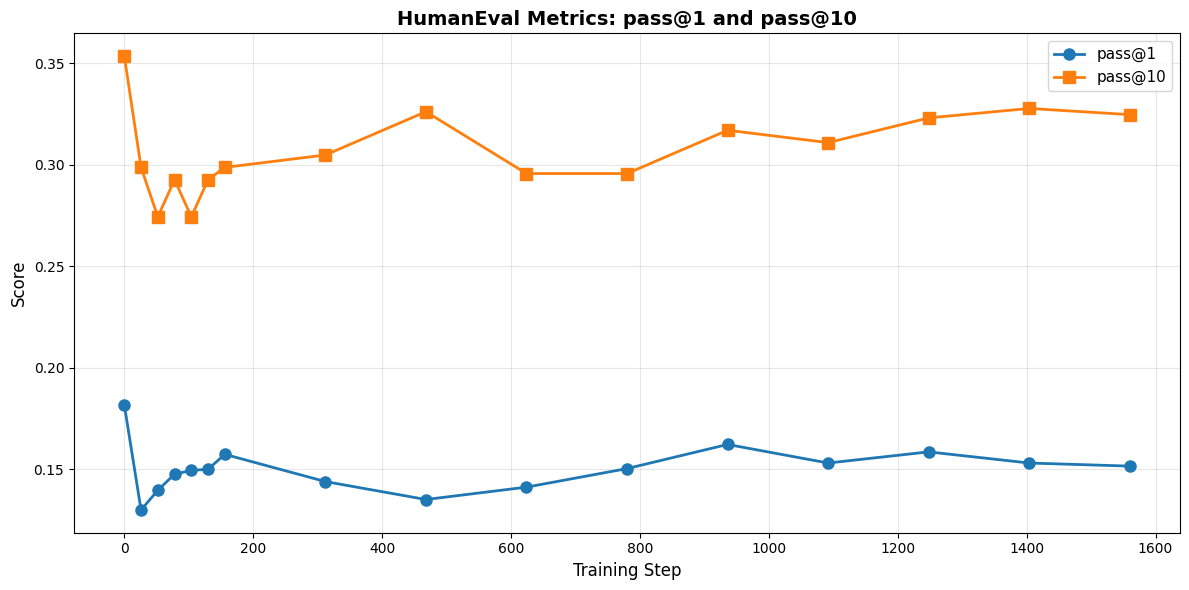


Summary Statistics:
pass@1 - Min: 0.1299, Max: 0.1817, Mean: 0.1503
pass@10 - Min: 0.2744, Max: 0.3537, Mean: 0.3070


In [8]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot pass@1 and pass@10
plt.plot(df['step'], df['pass@1'], marker='o', label='pass@1', linewidth=2, markersize=8)
plt.plot(df['step'], df['pass@10'], marker='s', label='pass@10', linewidth=2, markersize=8)

# Customize the plot
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('HumanEval Metrics: pass@1 and pass@10', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"pass@1 - Min: {df['pass@1'].min():.4f}, Max: {df['pass@1'].max():.4f}, Mean: {df['pass@1'].mean():.4f}")
print(f"pass@10 - Min: {df['pass@10'].min():.4f}, Max: {df['pass@10'].max():.4f}, Mean: {df['pass@10'].mean():.4f}")


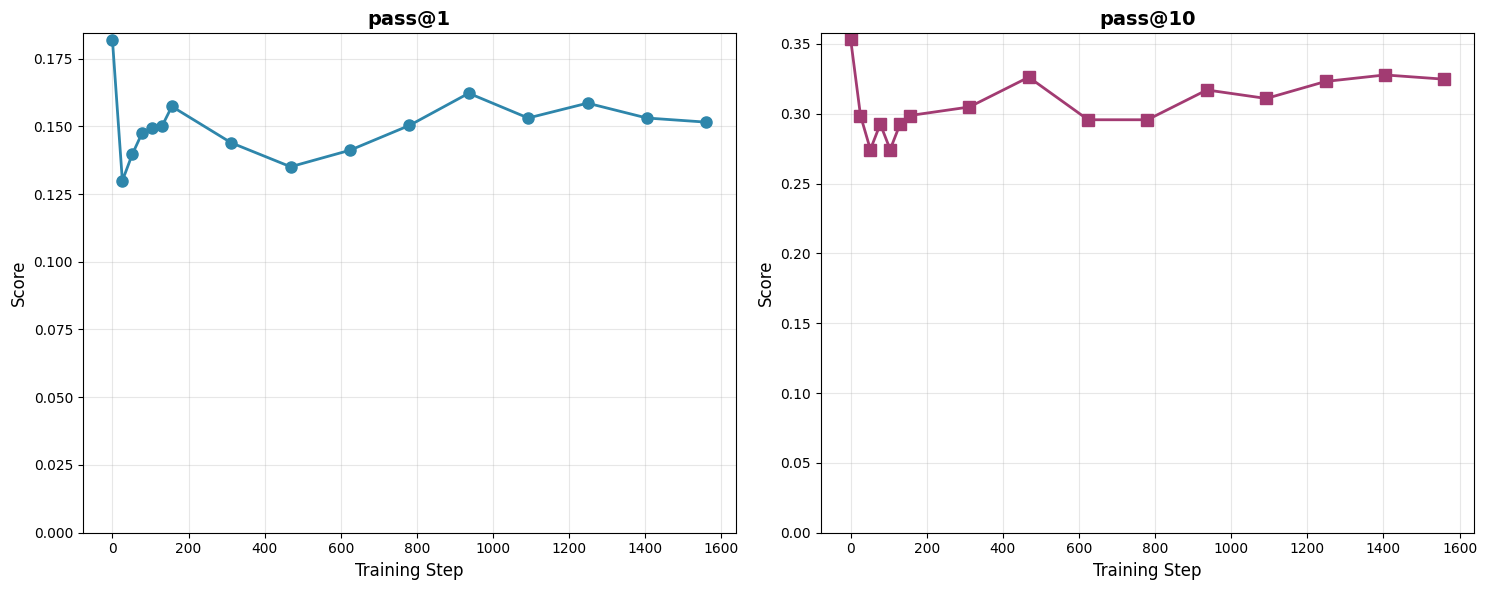

In [9]:
# Create a side-by-side comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot pass@1
ax1.plot(df['step'], df['pass@1'], marker='o', color='#2E86AB', linewidth=2, markersize=8)
ax1.set_xlabel('Training Step', fontsize=12)
ax1.set_ylabel('Score', fontsize=12)
ax1.set_title('pass@1', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(bottom=0)

# Plot pass@10
ax2.plot(df['step'], df['pass@10'], marker='s', color='#A23B72', linewidth=2, markersize=8)
ax2.set_xlabel('Training Step', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('pass@10', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.show()
